In [130]:
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kurtosis
import seaborn as sns
import missingpy
import math
import random
from missingpy import MissForest
from missingpy import KNNImputer

In [131]:
files = ['~/hbn_phenotypic/hbn-data/HBN_phenotypic_data/9994_ACE_20180927.csv', '~/hbn_phenotypic/hbn-data/HBN_phenotypic_data/9994_BDI_20180927.csv']
data_mats = []
for i in files:
        data = pd.read_csv(i, low_memory=False)
        data.drop(data.index[0], inplace=True)
        data.drop(data.columns[0:11], axis=1, inplace=True)
        data.drop(data.columns[-1:], axis=1, inplace=True)
        data_mats.append(data)
        
files = ['~/hbn_phenotypic/hbn-data/HBN_phenotypic_data/9994_CAARS_20180927.csv']

for i in files:
        data = pd.read_csv(i, low_memory=False)
        data.drop(data.index[0], inplace=True)
        data.drop(data.columns[0:11], axis=1, inplace=True)
        data.drop(data.columns[-10:], axis=1, inplace=True)
        data_mats.append(data)
        
k_neighb = [5, 2, 5]


In [132]:
trial = 0
nan = float("NaN")
err_mats_knn = []
err_mats_rf = []
for X in data_mats:
    err_rf = []
    err_knn = []
    for p in range(1,10):
        errRF = 0
        errKNN = 0
        for t in range(0,3):
            data = X.copy()
            #get shape of data
            lims = data.shape
            vals = data.size

            # 2 percent missing values
            x_indices = []
            y_indices = []
            pairs = []
            while len(pairs) != math.ceil(vals*p*.01):
                x = random.randint(0, lims[0] - 1)
                y = random.randint(0, lims[1] - 1)
                if (x,y) in pairs:
                    continue
                else:
                    x_indices.append(x)
                    y_indices.append(y)
                    pairs.append((x,y))
            prev_vals = []
            for i in range(len(x_indices)):
                prev_vals.append(data.iloc[x_indices[i], y_indices[i]])
                data.iloc[x_indices[i], y_indices[i]] = nan

            #imputate missing values
            imputer = MissForest(random_state=1337)
            new_data_rf = imputer.fit_transform(data)
            new_vals_rf = []
            for i in range(len(x_indices)):
                new_vals_rf.append(new_data_rf[x_indices[i], y_indices[i]])

            imputer = KNNImputer(n_neighbors = k_neighb[trial])
            new_data_knn = imputer.fit_transform(data)
            new_vals_knn = []
            for i in range(len(x_indices)):
                new_vals_knn.append(new_data_knn[x_indices[i], y_indices[i]])


            #print the difference

            print(prev_vals)
            new_vals_rf = np.around(new_vals_rf)
            new_vals_knn = np.around(new_vals_knn)
            print("RF")
            print(new_vals_rf)
            errRF += np.sum(abs(np.matrix(prev_vals, dtype = float) - np.matrix(new_vals_rf, dtype = float)))/len(prev_vals)
            print("KNN")
            print(new_vals_knn)
            errKNN += np.sum(abs(np.matrix(prev_vals, dtype = float) - np.matrix(new_vals_knn, dtype = float)))/len(prev_vals)
        err_rf.append(errRF/3.0)
        err_knn.append(errKNN/3.0)
    trial = trial + 1
    err_mats_knn.append(err_knn)
    err_mats_rf.append(err_rf)



Iteration: 0
Iteration: 1
Iteration: 2
['1', '0', '0', '0']
RF
[ 1.  0.  0.  0.]
KNN
[ 0.  0.  0.  0.]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
['0', '0', '0', '1']
RF
[ 0.  0.  0.  1.]
KNN
[ 0.  0.  0.  0.]
Iteration: 0
Iteration: 1
Iteration: 2
['0', '0', '0', '0']
RF
[ 0.  0.  0.  0.]
KNN
[ 0.  0.  0.  0.]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
['0', '1', '1', '0', '0', '0', '0', '1']
RF
[ 0.  0.  1.  0.  0.  0.  0.  1.]
KNN
[ 0.  0.  0.  0.  0.  0.  0.  0.]
Iteration: 0
Iteration: 1
Iteration: 2
['0', '0', '0', '0', '0', '0', '0', '0']
RF
[ 0.  0.  0.  0.  0.  0.  0.  0.]
KNN
[ 0.  0.  0.  0.  0.  0.  0.  0.]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
['1', '1', '0', '0', '0', '0', '0', '1']
RF
[ 0.  0.  0.  0.  0.  0.  0.  1.]
KNN
[ 0.  0.  0.  0.  0.  0.  0.  0.]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
['0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
RF
[ 0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
KNN
[ 0.

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0']
RF
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
KNN
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Iteration: 0
Iteration: 1
Iteration: 2
['1']
RF
[ 1.]
KNN
[ 1.]
Iteration: 0
Iteration: 1
Iteration: 2
['0']
RF
[ 1.]
KNN
[ 2.]
Iteration: 0
Iteration: 1
Iteration: 2
['0']
RF
[ 1.]
KNN
[ 0.]
Iteration: 0
Iteration: 1
Iteration: 2
['2', '4']
RF
[ 1.  1.]
KNN
[ 2.  2.]
Iteration: 0
Iteration: 1
Iteration: 2
['1', '1']
RF
[ 1.  1.]
KNN
[ 0.  1.]
Iteration: 0
Iteration: 1
Iteration: 2
['0', '1']
RF
[ 1.  1.]
KNN
[ 0.  1.]
Iteration: 0
Iteration: 1
Iter

/Users/paigefrank/Documents/NDD/NDD_venv/lib/python3.6/site-packages/missingpy/knnimpute.py:143: UserWarning: Insufficient number of neighbors! Filling in column mean.
  warnings.warn("Insufficient number of neighbors! "


Iteration: 0
Iteration: 1
Iteration: 2
['0', '0', '0', '0', '1', '1', '2']
RF
[ 1.  2.  3.  1.  0.  1.  0.]
KNN
[ 2.  2.  2.  1.  0.  1.  0.]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
['1', '2', '0', '0', '1', '0', '0', '0']
RF
[ 1.  2.  2.  1.  1.  1.  1.  1.]
KNN
[ 1.  2.  2.  0.  0.  1.  1.  1.]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
['0', '0', '1', '1', '0', '0', '1', '1']
RF
[ 0.  1.  0.  0.  1.  2.  0.  0.]
KNN
[ 0.  2.  1.  0.  1.  2.  0.  0.]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
['2', '0', '4', '1', '1', '0', '0', '1']
RF
[ 1.  1.  1.  0.  1.  1.  1.  0.]
KNN
[ 0.  0.  2.  0.  2.  1.  0.  0.]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
['0', '2', '2', '1', '1', '2', '0', '0', '1', '1', '0']
RF
[ 1.  2.  2.  0.  1.  1.  0.  0.  1.  2.  0.]
KNN
[ 1.  2.  2.  0.  1.  1.  0.  0.  1.  1.  0.]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
['1', '2', '0', '0', '0', '0', '3', '1', '0', '1', '1']
RF
[ 1.  2.  0.  1.  0.  1.  2.  1.  0.

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
['3', '2', '2', '1', '1', '1', '0', '0', '1', '2', '2', '1', '1', '0', '1', '2', '1', '2', '0', '3', '0', '2', '1', '0', '1', '1', '2', '3', '2', '1', '2', '1', '3', '0', '3', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '2', '1', '1', '0', '2', '2', '2', '2', '1', '2', '3', '0', '2', '0', '0', '0', '0', '0', '3']
RF
[ 1.  1.  2.  2.  1.  1.  0.  0.  1.  2.  1.  1.  2.  0.  1.  3.  2.  2.
  1.  2.  1.  1.  1.  0.  1.  0.  2.  1.  1.  1.  1.  1.  1.  2.  2.  0.
  1.  1.  0.  1.  1.  2.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  2.  1.
  1.  1.  2.  1.  1.  1.  1.  0.  2.  1.  0.  1.]
KNN
[ 1.  2.  2.  2.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  3.  2.  2.
  1.  2.  1.  1.  0.  1.  2.  1.  1.  1.  0.  1.  1.  1.  2.  2.  2.  0.
  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  2.  2.
  1.  1.  1.  1.  1.  1.  1.  0.  2.  1.  0.  1.]
Iteration: 0
Iterati

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
['0', '0', '1', '1', '1', '0', '1', '3', '1', '2', '0', '1', '1', '0', '3', '1', '2', '0', '0', '0', '0', '0', '1', '0', '1', '3', '2', '3', '0', '1', '0', '0', '2', '1', '3', '0', '3', '0', '1', '2', '0', '3', '2', '1', '0', '2', '2', '1', '2', '1', '1', '0', '0', '2', '0', '3', '2', '2', '2', '0', '1', '0', '3', '3', '2', '2', '0', '3', '2', '1', '1', '2', '0', '3', '2', '1', '0', '0', '2', '0', '1', '0', '2', '1', '3', '1', '0', '0']
RF
[ 1.  0.  1.  0.  2.  1.  1.  2.  2.  2.  1.  2.  1.  1.  2.  0.  1.  0.
  1.  2.  1.  1.  1.  1.  1.  2.  1.  0.  2.  1.  2.  2.  1.  1.  2.  1.
  2.  2.  1.  1.  2.  2.  2.  1.  1.  0.  2.  1.  1.  1.  2.  0.  0.  1.
  0.  2.  1.  1.  2.  1.  2.  0.  2.  2.  2.  1.  1.  2.  1.  1.  1.  1.
  0.  2.  2.  1.  1.  1.  1.  0.  1.  1.  2.  1.  3.  1.  0.  0.]
KNN
[ 1.  0.  1.  0.  1.  1.  1.  2.  1.  2.  1.  1.  1.  2.  1.  0.  1.  0.
  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  2

In [133]:
print(err_mats_rf)
print(err_mats_knn)

[[0.0, 0.125, 0.083333333333333329, 0.041666666666666664, 0.18333333333333335, 0.23611111111111108, 0.20238095238095236, 0.19791666666666666, 0.25], [0.66666666666666663, 0.83333333333333337, 1.0000000000000002, 0.75, 0.66666666666666663, 0.72222222222222232, 0.88888888888888895, 1.0476190476190477, 0.95833333333333337], [0.30303030303030304, 0.53030303030303028, 0.68686868686868685, 0.71969696969696972, 0.69090909090909092, 0.59595959595959591, 0.57575757575757569, 0.68939393939393945, 0.64309764309764317]]
[[0.16666666666666666, 0.25, 0.13888888888888887, 0.14583333333333334, 0.23333333333333331, 0.22222222222222224, 0.20238095238095236, 0.1875, 0.22222222222222221], [0.66666666666666663, 0.5, 1.0000000000000002, 0.66666666666666663, 0.73333333333333339, 0.83333333333333337, 0.94444444444444431, 1.142857142857143, 0.91666666666666663], [0.39393939393939387, 0.56060606060606066, 0.63636363636363635, 0.74242424242424232, 0.63636363636363635, 0.60101010101010099, 0.5757575757575758, 0.6

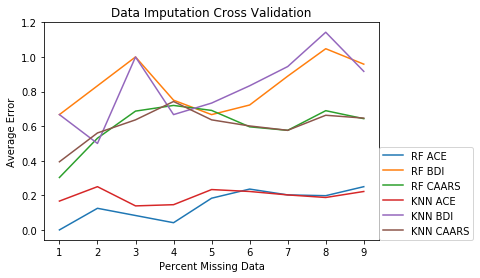

In [139]:
x_vals=[1,2,3,4,5,6,7,8,9]
y1=err_mats_rf[0]
y2=err_mats_rf[1]
y3=err_mats_rf[2]
y4=err_mats_knn[0]
y5=err_mats_knn[1]
y6=err_mats_knn[2]
plt.plot(x_vals,y1, label='RF ACE')
plt.plot(x_vals,y2, label='RF BDI')
plt.plot(x_vals,y3, label='RF CAARS')
plt.xlabel('Percent Missing Data')
plt.ylabel('Average Error')
plt.title('Data Imputation Cross Validation')
plt.plot(x_vals,y4, label='KNN ACE')
plt.plot(x_vals,y5, label='KNN BDI')
plt.plot(x_vals,y6, label='KNN CAARS')
plt.legend(loc = (1,0))

